# CS-UY 3943 - Introduction of Data Science
## Week 4: Statistical Inference in Python

Please edit the cell below to add your name, NetID, assigned group, and group members for this assignment. **Complete this section before proceeding to the assignment questions.**

Name:  Lenny Remache
NetID:  ljr381
Group (Letter):  A
Group Member 1:  Yashar Nasir
Group Member 2:  Jason Zhagui 
***

### Introduction
The data for this assignment comes from a [Kaggle](http://www.kaggle.com) competition designed with a goal of predicting the housing prices in the Ames, Iowa housing market given a number of attributes for each home. For this week's assignment, we will be using the dataset provided by Kaggle but our goals will differ from the original purpose of the competition.  

1\. Read the data file **housing_data.csv** into your program as a `pandas` `DataFrame`. The sale price (in the `SalePrice` column) of homes is one of the features of interest in this data. Make two separate plots that show the distribution of sale prices in the dataset. There are multiple plot types that can be used to visualize the distribution but you are only required to use two different distribution visualization techniques for this exercise. (Don't forget to label your axes for your plots).

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Place your code here
housingDF = pd.read_csv('housing_data.csv')
housingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
salePriceDF = pd.DataFrame(housingDF['SalePrice'])
salePriceDF.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [17]:
print(salePriceDF.index)

RangeIndex(start=0, stop=1460, step=1)


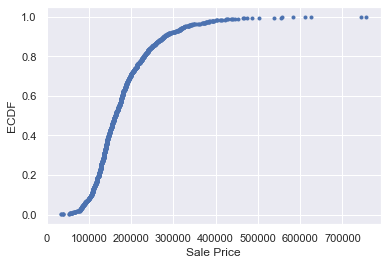

In [47]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x_housing, y_housing = ecdf(salePriceDF['SalePrice'])

# Generate plot
_ = plt.plot(x_housing, y_housing, marker='.', linestyle='none')

# Label the axes
_ = plt.ylabel("ECDF")
_ = plt.xlabel("Sale Price")

# Display the plot
plt.show()

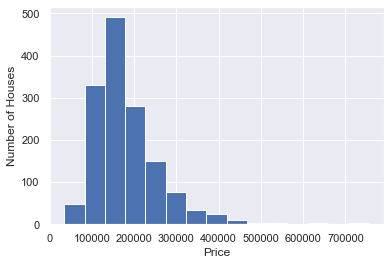

In [43]:
sns.set()
_ = plt.hist(salePriceDF, bins=15)
_ = plt.xlabel('Sale Price')
_ = plt.ylabel('Number of Houses')
plt.show()

2\. Depending on how you chose to visualize the distribution, you likely can see a wide range of sale prices concentrated between 100k and 300k with a long tail. In a later, assignment the goal will be to attempt to predict sale prices from features available in the dataset. For now, consider a single characteristic of what feature might impact the sale price of a home. It is reasonable to think that using the raw sale price of a house may not be the best metric for comparing homes. You would expect that in general larger homes would sell for higher prices than smaller homes. For example, a studio apartment is likely to cost less than a single family home with 4 bedrooms and 2 bathrooms. To better compare home prices, it is advantageous to take the size of the home into account. However, the dataset under analysis does not include a single feature representing the size of a home. For this step, make 2 transformations of the data:
1. Create a new column `TotalSF` containing the estimated number of square feet for each home. Use the sum of following columns to calculate this value: `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `WoodDeckSF`, `OpenPorchSF`.
2. Calculate the sale price per square foot (sq. ft.) and add these values as a column named `PricePerSqFt`. 

Once you have added `PricePerSqFt` to your `DataFrame`, plot the distribution of these values and compare the distribution to that of the raw sale price.

In [51]:
housingDF['TotalSF'] = housingDF['TotalBsmtSF'] + housingDF['1stFlrSF'] + housingDF['2ndFlrSF'] + housingDF['WoodDeckSF'] + housingDF['OpenPorchSF']
housingDF['TotalSF'].head()


0    2627
1    2822
2    2748
3    2508
4    3619
Name: TotalSF, dtype: int64

In [52]:
housingDF['PricePerSqFt'] = housingDF['SalePrice'] / housingDF['TotalSF']
housingDF['PricePerSqFt'].head()

0    79.368100
1    64.316088
2    81.331878
3    55.821372
4    69.079856
Name: PricePerSqFt, dtype: float64

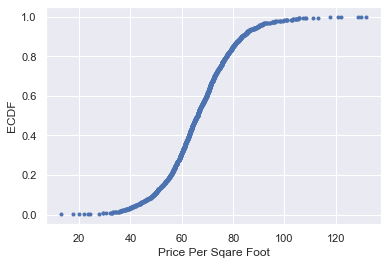

In [55]:
x_PricePerSqFt, y_PricePerSqFt = ecdf(housingDF['PricePerSqFt'])

# Generate plot
_ = plt.plot(x_PricePerSqFt, y_PricePerSqFt, marker='.', linestyle='none')

# Label the axes
_ = plt.ylabel("ECDF")
_ = plt.xlabel("Price Per Sqare Foot")

# Display the plot
plt.show()

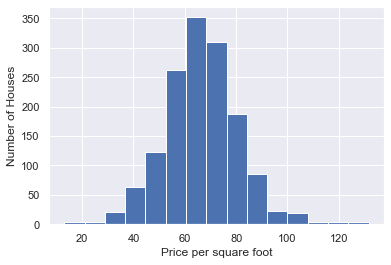

In [57]:
sns.set()
_ = plt.hist(housingDF['PricePerSqFt'], bins=15)
_ = plt.xlabel('Price per square foot')
_ = plt.ylabel('Number of Houses')
plt.show()

<p>
<span style="color:blue">
    <em>The distribution of price per square foot of a house seems to be closer to being normally distributed as one side of the histogram does not have a longer tail than the other. In comparison to the distrubution of the raw sale price, the raw sale price had a longer tail for house prices above 300k while prices in general were more concentrated to the left between 100k and 300k. Whereas here the price per square foot of a house is more concentrated between 50 and 90.
    </em>
</span>
</p>

3\. Imagine that you are interested in buying a home in this market. Concerned with the maintenance that is required for older homes, you would like to focus your home search on homes that were built more recently. Therefore, you will restrict your search to homes built since 1946. However, you are undecided on whether to purchase a 1-story or 2-story home. To better focus your search, you would like to determine if there is a difference in the value of 1-story homes when compared to 2-story homes that have been built since 1946. Create a plot that allows you to visually compare the distribution of 1-story compared to 2-story homes based on sale prices per square foot for homes built since 1946.

* Create two `pandas` `Series` objects: one containing the sale price per square foot for 1-story homes built since 1946 and the other containing the sale price per square foot for 2-story homes built since 1946. **Note** the following mapping between `MSSubClass` values and their descriptions:

```text
20  1-STORY 1946 & NEWER ALL STYLES
60  2-STORY 1946 & NEWER
120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
160 2-STORY PUD - 1946 & NEWER
```
* Construct a plot that allows for the comparison of the distribution of the values of 1-story and 2-story homes built since 1946.

Does your visualization give you reason to believe that there is a difference in the value of 1-story homes compared to 2-story homes?

In [92]:
# Place your code here

isOne = housingDF[(housingDF['MSSubClass'] == 20) | (housingDF['MSSubClass'] == 120)]
isTwo = housingDF[(housingDF['MSSubClass'] == 60) | (housingDF['MSSubClass'] == 160)]
#print(isOne)
#print(isTwo)

one_ser = pd.Series(isOne['PricePerSqFt'])
two_ser = pd.Series(isTwo['PricePerSqFt'])

print('Is One Story after 1946?')
print(one_ser)
print()
print('Is Two Story after 1946?')
print(two_ser)


Is One Story after 1946?
1       64.316088
6       83.152763
10      62.259615
12      73.319756
13      87.865451
          ...    
1453    35.623946
1454    72.407045
1456    52.976791
1458    56.354084
1459    44.481303
Name: PricePerSqFt, Length: 623, dtype: float64

Is Two Story after 1946?
0       79.368100
2       81.331878
4       69.079856
7       55.005501
11      94.082356
          ...    
1433    68.365103
1439    83.758503
1442    95.561036
1447    71.111111
1455    66.287879
Name: PricePerSqFt, Length: 362, dtype: float64


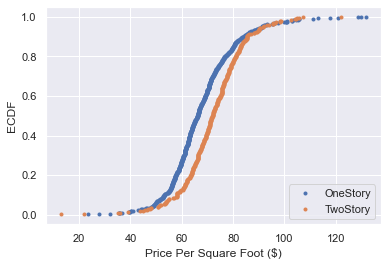

In [96]:
x_one, y_one = ecdf(one_ser)
x_two, y_two = ecdf(two_ser)

_ = plt.plot(x_one,y_one,marker='.',linestyle='none')
_ = plt.plot(x_two,y_two,marker='.',linestyle='none')

plt.legend(('OneStory', 'TwoStory'), loc='lower right')
_ = plt.xlabel('Price Per Square Foot ($)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

<p>
<span style="color:blue">
    <em>My ecdf visualization does give reason to believe that there is a difference in value in 1-story homes and 2-story homes since most one-story homes have overall a lower price per square foot. There are two-story houses that have a similar price per square foot between 20 to 50 AND 90 to 110. However most data points are in the center where one story houses have lower prices per square foot.</em>
</span>
</p>

4\. It may be apparent from the distribution plots that some outlier values exist in the data. One way to account for the presence of extreme values when summarizing a dataset is by calculating the median as the summary statistic. Define and execute a bootstrap hypothesis test to determine if the data provides evidence for a difference in the value of 1-story homes compared to 2-story homes in the market that have been built since 1946. Recall the necessary components of a hypothesis test.
* State the null hypothesis
* Define a test statistic
* Generate many data sets assuming the null hypothesis is true
* Compute the test statistic for each data set
* Compute a p-value as the fraction of the simulated data sets with a test statistic as extreme as the one observed
* Evaluate how likely the null hypothesis is given the calculated p-value

<p>
<span style="color:blue">
    <em>The value of 1-story homes is the same as 2-story homes in the market that have been built since 1946.</em>
</span>
</p>

<p>
<span style="color:blue">
    <em>Test Statistic: Mean of PricePerSqFt for all 1-story and 2-story houses built since 1946 -> 69.3389248611983</em>
</span>
</p>

In [98]:
mean_PricePerSqFt = np.mean(np.concatenate((isOne['PricePerSqFt'],isTwo['PricePerSqFt'])))
print(mean_PricePerSqFt)

69.3389248611983


In [104]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates


In [110]:
empirical_diff_means = diff_of_means(isOne['PricePerSqFt'],isTwo['PricePerSqFt'])

one_shifted = isOne['PricePerSqFt'] - np.mean(isOne['PricePerSqFt']) + mean_PricePerSqFt
two_shifted = isTwo['PricePerSqFt'] - np.mean(isTwo['PricePerSqFt']) + mean_PricePerSqFt

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_one = draw_bs_reps(one_shifted, np.mean, size=10000)
bs_replicates_two = draw_bs_reps(two_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_one - bs_replicates_two

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


p-value = 1.0


<p>
<span style="color:blue">
    <em>Evaluate the null hypothesis</em>
</span>
</p>

5\. As a home buyer in this marker is the home value (defined as the price per sq. ft.) a good basis for preferring 2-story homes vs 1-story homes or vice versa?

<p>
<span style="color:blue">
    <em>Place response here</em>
</span>
</p>